## Water Quality Explanatory Data Analysis?
* Bivariate and multivariate data analysis
* Correlation analysis
* Preprocessing: missing value, train-test split and normalization
* Modelling: Decision Tree and Random Forest Classifiers
* Visulize Decision Tree
* Random Forest Hyperparameter Tuning 

## Introduction

* Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

* Drinking water and staying hybrated is asconding whit a reduced incidence of urinary tract infections (UTIs), lower blood pressure and heart disease. Therefore drinking water is essential for good heart health.
* Water is the most important nutrient dor the body. It has many benefits for your helps to project you from illness and disease. Water is also an essential part of a healty lifestyle.

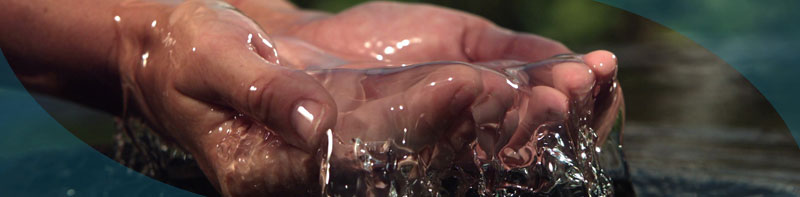

## Analysis Content
1. [Python Libraries](#1)

<a id=1></a>
## Python Libraries

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import precision_score, confusion_matrix

from sklearn import tree

/kaggle/input/water-potability/water_potability.csv
